<a href="https://colab.research.google.com/github/Shamiso-Tirivanhu/Loans-Status-Prediction-Using-Python-Machine-Learning/blob/main/Loan_Status_Prediction_Using_ML_%26_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# importing data
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data (1).csv


In [4]:
# Loading the dataset into a dataframe
loan_dataset = pd.read_csv('loan_data.csv')

In [5]:
# Display the first five rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
# Number of rows & columns
loan_dataset.shape

(381, 13)

In [7]:
# Statistical measures for our dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [8]:
# Number of missing values
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [9]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [10]:
# Checking for missing values
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [17]:
# Label encoding
#pd.set_option('future.on_silent_downcasting',True)
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# print the first five rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [18]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [19]:
# Replacing 3+ with a 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [20]:
# Dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
4,24


<Axes: xlabel='Education', ylabel='count'>

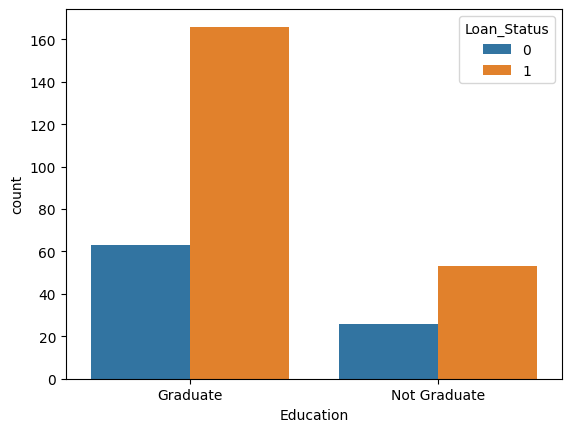

In [21]:
# Visualize education & loan status data
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

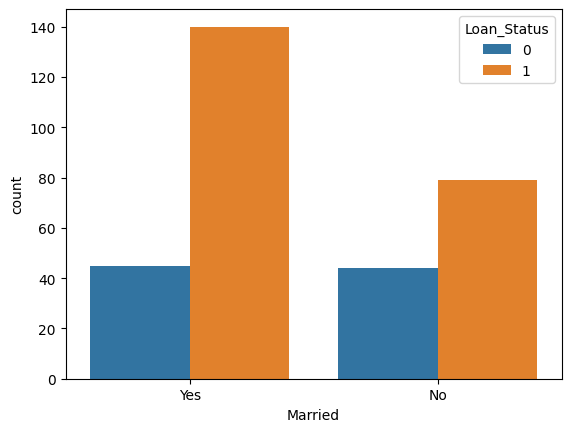

In [22]:
# Visualize marital status & loan status data
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [26]:
# Convert categorical columns to numerical values
loan_dataset = loan_dataset.replace({'Married':{'No':0,'Yes':1},
                                     'Gender':{'Male':1,'Female':0},
                                     'Self_Employed':{'No':0,'Yes':1},
                                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                                     'Education':{'Graduate':1, 'Not Graduate':0}})

# Ensure all columns are numeric
loan_dataset = loan_dataset.apply(pd.to_numeric, errors='coerce')

pd.set_option('future.no_silent_downcasting', True)

In [27]:
# Separate the data & label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']


In [28]:
# Display the features and target
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           1          1              0             4583   
1         1        1           0          1              1             3000   
2         1        1           0          0              0             2583   
3         1        0           0          1              0             6000   
4         1        1           0          0              0             2333   
..      ...      ...         ...        ...            ...              ...   
376       1        1           4          1              0             5703   
377       1        1           0          1              0             3232   
378       0        0           0          1              0             2900   
379       1        1           4          1              0             4106   
380       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [29]:
# Splitting the data into training & testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [30]:
# Checking the shape
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (277, 11) (31, 11)


In [31]:
# Trainig the model
classifier=svm.SVC(kernel='linear')

In [32]:
# Training the Support Vector Machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [33]:
# Model evaluation
# acuuracy_score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [34]:
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.8267148014440433


In [35]:
# Accuracy data on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [36]:
print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.8064516129032258


In [37]:
# Making a prediction system
input_data = (1,1,2,1,0,4000,0,1,0,0,1)